# **Training a Classification Model:**
## **Predicting Customer Response to a Marketing Campaign**

In [33]:
#libraries import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

#
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay

First, we load the datasets. According to the results of EDA, `cleaned_df` contains samples cleared of anomalies according to the rule `drop all samples where the experience exceeds the age of a person - 16 years.`

In [34]:
df = pd.read_csv('./datasets/general_df.csv', index_col=0)
cleaned_df = pd.read_csv('./datasets/general_df_cleaned.csv', index_col=0)

display(df.head())
print('Number of samples in the original data:', len(df))
display(cleaned_df.head())
print('Number of samples in the cleaned data:', len(cleaned_df))

,target,credit,term,fst_payment,age,gender,education,marital_status,child_total,dependants,...,own_auto,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,closed_loans_count,total_loans_count,work_time_in_years
0,0,8000.00,6,8650.0,49,1,среднее специальное,состою в браке,2,1,...,0,от 10000 до 20000 руб.,5000.0,торговля,рабочий,вспомогательный техперсонал,18.0,1,1,1.0
2,0,21650.00,6,4000.0,32,1,среднее,состою в браке,3,3,...,0,от 10000 до 20000 руб.,12000.0,торговля,рабочий,участие в основ. деятельности,97.0,1,1,8.0
3,0,33126.00,12,4000.0,52,1,неполное среднее,состою в браке,4,0,...,0,от 10000 до 20000 руб.,9000.0,информационные технологии,специалист,участие в основ. деятельности,84.0,1,2,7.0
4,0,8491.82,6,5000.0,39,1,высшее,состою в браке,1,1,...,0,от 20000 до 50000 руб.,25000.0,образование,руководитель среднего звена,участие в основ. деятельности,168.0,1,1,14.0
5,0,21990.00,12,4000.0,30,0,среднее,состою в браке,0,0,...,0,от 10000 до 20000 руб.,12000.0,государственная служба,специалист,участие в основ. деятельности,101.0,1,2,8.0


Number of samples in the original data: 15223


,target,credit,term,fst_payment,age,gender,education,marital_status,child_total,dependants,...,own_auto,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,closed_loans_count,total_loans_count,work_time_in_years
0,0,8000.00,6,8650.0,49,1,Среднее специальное,Состою в браке,2,1,...,0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,1,1,1.0
2,0,21650.00,6,4000.0,32,1,Среднее,Состою в браке,3,3,...,0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,1,1,8.0
3,0,33126.00,12,4000.0,52,1,Неполное среднее,Состою в браке,4,0,...,0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,1,2,7.0
4,0,8491.82,6,5000.0,39,1,Высшее,Состою в браке,1,1,...,0,от 20000 до 50000 руб.,25000.0,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,1,1,14.0
5,0,21990.00,12,4000.0,30,0,Среднее,Состою в браке,0,0,...,0,от 10000 до 20000 руб.,12000.0,Государственная служба,Специалист,Участие в основ. деятельности,101.0,1,2,8.0


Number of samples in the cleaned data: 15179


Based on the data analysis, a large number of categories by region and working data were also found (features `'reg_address_province', 'fact_address_province', 'postal_address_province', 'gen_industry', 'gen_title', 'job_dir')`. These features will be excluded to create a more interpretable model.

In [35]:
continuous_features = ['credit', 'fst_payment', 'age', 'child_total', 'dependants', 
                       'own_auto', 'personal_income', 'work_time', 'work_time_in_years', 'closed_loans_count', 'total_loans_count']

categorical_features = set([i for i in df.columns if i not in continuous_features])

features_to_remove = set(['reg_address_province', 'fact_address_province', 'postal_address_province', 'gen_industry', 'gen_title', 'job_dir'])

In [36]:
categorical_features -= features_to_remove

In [37]:
df.drop(features_to_remove, axis=1, inplace=True)
cleaned_df.drop(features_to_remove, axis=1, inplace=True)

Also, a different number of observations were found in the categories of the features `education`, `term`, `marital_status`, `Family income`. \
So the next step of the work is the preprocessing all the features.

Education.

In [38]:
print('Basic data')
display(df['education'].value_counts())
print('\nCleaned data')
display(cleaned_df['education'].value_counts())

Basic data


education
среднее специальное               6518
среднее                           4679
высшее                            3133
неоконченное высшее                532
неполное среднее                   340
два и более высших образования      20
ученая степень                       1
Name: count, dtype: int64


Cleaned data


education
Среднее специальное               6500
Среднее                           4663
Высшее                            3123
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: count, dtype: int64

For this feature, we will choose the encoding by the OHE method. In addition, we will delete the column responsible for the categories `Неоконченное высшее`, `Неполное среднее`, `Два и более высших образования`, `Ученая степень` because there are less samples in these categories than 5% of the original dataset.

In [39]:
def get_OHE(data, feature, categories_to_remove):

    new_features = pd.get_dummies(data[feature])
    data[new_features.columns] = pd.get_dummies(data[feature])
    data = data.drop(categories_to_remove, axis=1)
    data = data.drop(feature, axis=1)
    
    return data

In [40]:
#Original data
df_encoded = get_OHE(df, 'education', ['неоконченное высшее', 'неполное среднее', 'два и более высших образования', 'ученая степень'])

#Cleaned data
df_cleaned_encoded = get_OHE(cleaned_df, 'education', ['Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Ученая степень'])

Term.

In [41]:
print('Basic data')
display(df['term'].value_counts())
print('\nCleaned data')
display(cleaned_df['term'].value_counts())

Basic data


term
6     5063
12    2951
10    2473
3     1919
5      626
9      542
4      446
8      401
18     263
24     166
7      143
11      63
36      50
15      49
14      20
13      17
16      15
20       6
23       4
22       3
30       2
19       1
Name: count, dtype: int64


Cleaned data


term
6     5048
12    2947
10    2467
3     1912
5      621
9      540
4      444
8      401
18     263
24     165
7      142
11      63
36      49
15      49
14      20
13      17
16      15
20       6
23       4
22       3
30       2
19       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of loans for different terms')

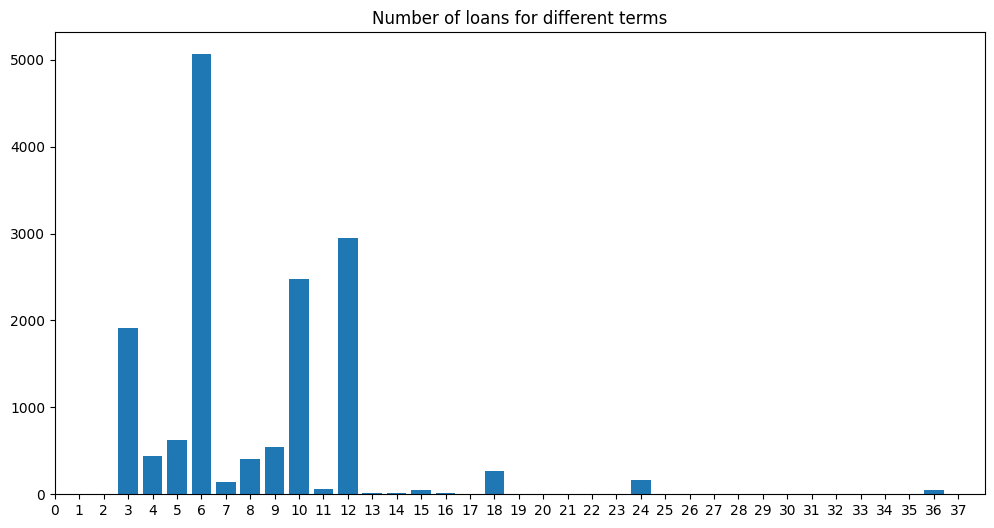

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

bar = plt.bar(x=df['term'].value_counts().index, height=list(df['term'].value_counts()))
plt.xticks(range(0, 38));
plt.title('Number of loans for different terms')

This feature will be divided into categories with the preservation of the most popular. 
- More than 12 months
- 11-12 months
- 7-10 months
- 4-6 months
- 1-3 months

In [43]:
def split_term_feature(x):
    if x > 0 and x <= 3:
        return 0
    elif x > 3 and x <= 6:
        return 1
    elif x > 6 and x <= 10:
        return 2
    elif x > 10 and x <= 12:
        return 3
    elif x > 12:
        return 4
    else:
        return None

In [44]:
df['term'] = df['term'].apply(lambda x: split_term_feature(x))
cleaned_df['term'] = cleaned_df['term'].apply(lambda x: split_term_feature(x))

Martial status.

In [45]:
print('Basic data')
display(df['marital_status'].value_counts())
print('\nCleaned data')
display(cleaned_df['marital_status'].value_counts())

Basic data


marital_status
состою в браке        9416
не состоял в браке    3622
разведен(а)           1245
вдовец/вдова           588
гражданский брак       352
Name: count, dtype: int64


Cleaned data


marital_status
Состою в браке        9383
Не состоял в браке    3617
Разведен(а)           1241
Вдовец/Вдова           586
Гражданский брак       352
Name: count, dtype: int64

This category will simply be encoded by the OHE method and we will delete `Гражданский брак`, `Вдовец/Вдова`.

In [46]:
#Original data
df_encoded = get_OHE(df_encoded, 'marital_status', ['вдовец/вдова', 'гражданский брак'])

#Cleaned data
df_cleaned_encoded = get_OHE(df_cleaned_encoded, 'marital_status', ['Вдовец/Вдова', 'Гражданский брак'])

Family income.

In [47]:
print('Basic data')
display(df['family_income'].value_counts())
print('\nCleaned data')
display(cleaned_df['family_income'].value_counts())

Basic data


family_income
от 10000 до 20000 руб.    7077
от 20000 до 50000 руб.    6082
от 5000 до 10000 руб.     1512
свыше 50000 руб.           492
до 5000 руб.                60
Name: count, dtype: int64


Cleaned data


family_income
от 10000 до 20000 руб.    7058
от 20000 до 50000 руб.    6061
от 5000 до 10000 руб.     1510
свыше 50000 руб.           490
до 5000 руб.                60
Name: count, dtype: int64

In [48]:
#Original data
df_encoded = get_OHE(df_encoded, 'family_income', ['свыше 50000 руб.', 'до 5000 руб.'])

#Cleaned data
df_cleaned_encoded = get_OHE(df_cleaned_encoded, 'family_income', ['свыше 50000 руб.', 'до 5000 руб.'])

Let's look at the correlations and remove the correlated features.

In [49]:
continuous_features.remove('work_time')

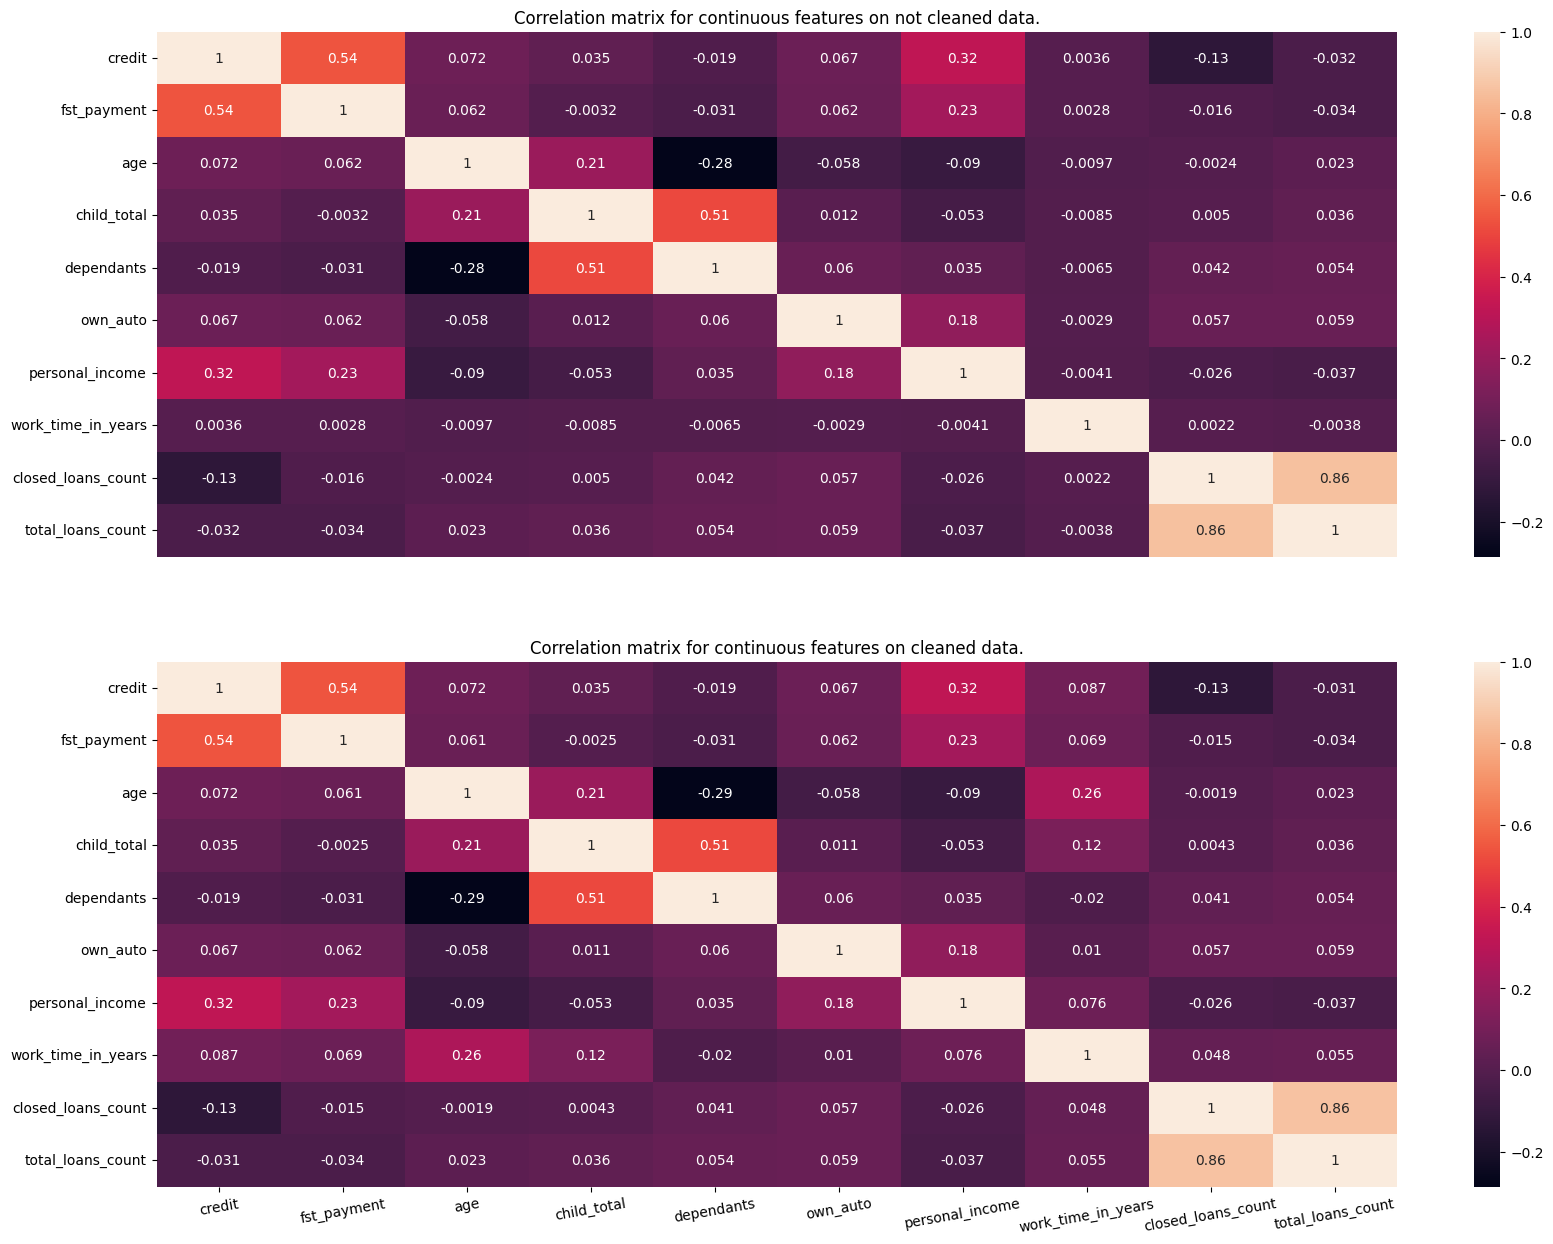

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

sns.heatmap(df_encoded[continuous_features].corr(), annot=True, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_title('Correlation matrix for continuous features on not cleaned data.')

sns.heatmap(df_cleaned_encoded[continuous_features].corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation matrix for continuous features on cleaned data.')

plt.xticks(rotation=10);

From the original data we will remove features `fst_payment`, `dependants`, `closed_loans_count`.
From the original data we will remove these features too. 

In [125]:
df_encoded.drop(['work_time', 'closed_loans_count'], axis=1, inplace=True)
df_cleaned_encoded.drop(['work_time', 'closed_loans_count'], axis=1, inplace=True)

KeyError: "['work_time', 'closed_loans_count'] not found in axis"

Testing basic models.

In [126]:
def get_basic_results(model, X_train, X_test, y_train, y_test, title):
    
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    f1_sc = []
    probas = []
    
    for i in range(1, 100, 1):
        
        f1 = f1_score(y_test, model.predict_proba(X_test)[:, 0] < i/100)
        f1_sc.append(f1)
        probas.append(i/100)

    max_x = probas[np.argmax(f1_sc)]
    max_y = max(f1_sc)

    plt.scatter(max_x, max_y, label=f'Max f1 score: {round(max_y, 3)} with proba {max_x}', c='orange')
    plt.plot(probas, f1_sc)
    plt.legend()
    
    plt.xlabel('probability')
    plt.ylabel('f1 score')

    plt.title('F1 score values')

    

    print(title)
    print('ROC-auc:', roc_auc_score(y_test, predictions))
    print('F1 score', f1_score(y_test, predictions))
    print('Balanced accuracy:', balanced_accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

    return model

Logistic Regression on all data
ROC-auc: 0.6352470930232559
F1 score 0.2955815134586084
Balanced accuracy: 0.6352470930232559
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      3072
           1       0.19      0.68      0.30       430

    accuracy                           0.60      3502
   macro avg       0.56      0.64      0.51      3502
weighted avg       0.84      0.60      0.67      3502



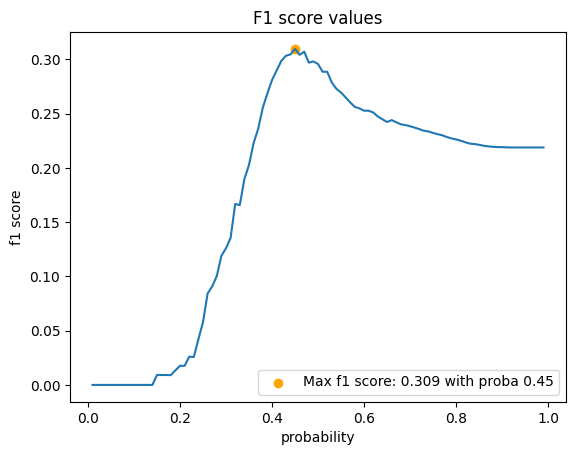

In [127]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(['target'], axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

lr = get_basic_results(LogisticRegression(class_weight='balanced'), X_train_transformed, X_test_transformed, y_train, y_test, 'Logistic Regression on all data')


ROC-auc: 0.6325959288989372
F1 score 0.2891820580474934
Balanced accuracy: 0.6325959288989372
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      2937
           1       0.18      0.68      0.29       403

    accuracy                           0.60      3340
   macro avg       0.56      0.63      0.50      3340
weighted avg       0.84      0.60      0.67      3340



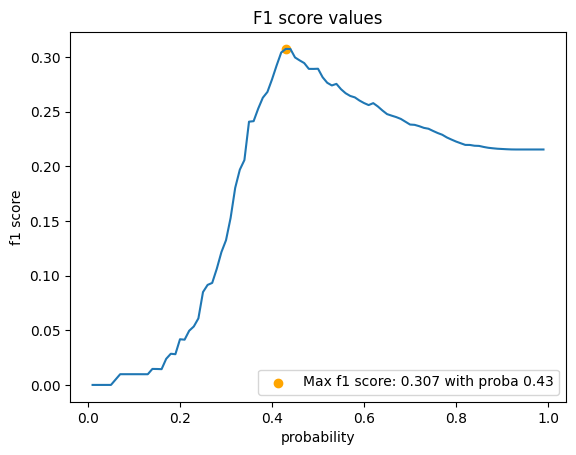

In [128]:
X = df_cleaned_encoded.drop(['target'], axis=1)
y = df_cleaned_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

lr = get_basic_results(LogisticRegression(class_weight='balanced'), X_train_transformed, X_test_transformed, y_train, y_test, '')